In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,SpatialDropout2D
from keras.layers import Conv2D, MaxPooling2D
from matplotlib import pyplot as plt

In [2]:
#imagenet or CIFAR
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# separate the train for validation
from sklearn.model_selection import train_test_split
x_train1, x_valid, y_train1, y_valid = train_test_split(x_train, y_train, test_size=0.2)

x_train = x_train1.astype('float32') / 255 
x_valid = x_valid.astype('float32') / 255
x_test = x_test.astype('float32') / 255

from keras.utils.np_utils import to_categorical
N = 10
y_train = to_categorical(y_train1, N)
y_valid = to_categorical(y_valid, N)
y_test = to_categorical(y_test, N)

print(x_train.shape)
print(x_valid.shape)
print(x_test.shape)

170500096/170498071 [==============================] - 6s 0us/step
(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [3]:
def Model():
  
    model = Sequential()
    
    model.add(Conv2D(64, kernel_size=(5,5), strides = 1, padding='same', activation='relu', input_shape=(32, 32, 3))) # 1st Layer
    model.add(SpatialDropout2D(rate=0.2))
    model.add(MaxPooling2D(pool_size=(2,2),  strides = 2, padding='same'))
    
    model.add(Conv2D(192, kernel_size=(5,5), strides = 1, padding='same', activation='relu'))       # 2nd Layer
    model.add(SpatialDropout2D(rate=0.2))
    model.add(MaxPooling2D(pool_size=(2,2),  strides = 2))
    
    model.add(Conv2D(384, kernel_size=(3,3), strides = 1, padding='same', activation='relu'))       # 3rd Layer
    model.add(SpatialDropout2D(rate=0.2))
    model.add(MaxPooling2D(pool_size=(2,2),  strides = 2))
    
    model.add(Conv2D(256, kernel_size=(5,5), strides = 1, padding='same', activation='relu'))       # 4th Layer
    model.add(SpatialDropout2D(rate=0.2))
    model.add(MaxPooling2D(pool_size=(2,2),  strides = 2))
    
    model.add(Conv2D(256, kernel_size=(5,5), strides = 1, padding='same', activation='relu'))       # 5th Layer
    model.add(SpatialDropout2D(rate=0.2))
    model.add(MaxPooling2D(pool_size=(2,2), strides = 2))
    
    model.add(Flatten())
    
    model.add(Dense(4096, activation='relu'))                     # 6th Layer
    model.add(Dropout(rate=0.5))
    
    model.add(Dense(4096, activation='relu'))                     # 7th Layer
    model.add(Dropout(rate=0.5))
    
    model.add(Dense(10,activation='softmax'))                     # 8th Layer
    return model


model = Model()

from keras.optimizers import RMSprop
model.compile(loss='categorical_crossentropy',
              # optimizer=RMSprop(learning_rate = 0.001),
              optimizer = 'adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        4864      
_________________________________________________________________
spatial_dropout2d (SpatialDr (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 192)       307392    
_________________________________________________________________
spatial_dropout2d_1 (Spatial (None, 16, 16, 192)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 192)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 384)         6

In [4]:
# verbose = setting up the progress bar
history = model.fit(x_train, y_train, batch_size=128, epochs=50, verbose=1, validation_data=(x_valid, y_valid))

# model.save_weights("mnist.hdf5") 
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/50
313/313 [==============================] - 17s 31ms/step - loss: 2.3049 - accuracy: 0.0957 - val_loss: 2.3027 - val_accuracy: 0.1004
Epoch 2/50
313/313 [==============================] - 9s 28ms/step - loss: 2.2814 - accuracy: 0.1109 - val_loss: 1.8926 - val_accuracy: 0.2979
Epoch 3/50
313/313 [==============================] - 9s 28ms/step - loss: 1.8439 - accuracy: 0.3000 - val_loss: 1.5298 - val_accuracy: 0.4229
Epoch 4/50
313/313 [==============================] - 9s 28ms/step - loss: 1.6461 - accuracy: 0.3957 - val_loss: 1.4196 - val_accuracy: 0.4847
Epoch 5/50
313/313 [==============================] - 9s 28ms/step - loss: 1.5096 - accuracy: 0.4541 - val_loss: 1.2926 - val_accuracy: 0.5293
Epoch 6/50
313/313 [==============================] - 9s 28ms/step - loss: 1.4213 - accuracy: 0.4892 - val_loss: 1.2619 - val_accuracy: 0.5475
Epoch 7/50
313/313 [==============================] - 9s 28ms/step - loss: 1.3581 - accuracy: 0.5182 - val_loss: 1.1791 - val_accuracy: 0.573

In [5]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.8025 - accuracy: 0.7339


[0.8025144338607788, 0.7339000105857849]

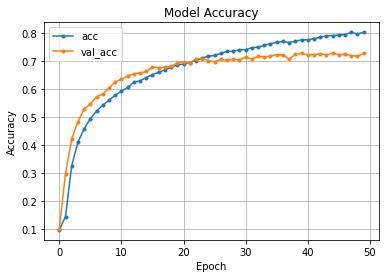

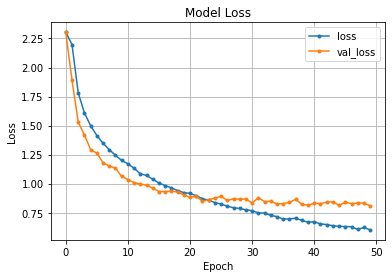

In [6]:
# plot
plt.plot(history.history['accuracy'], marker='.', label='acc')
plt.plot(history.history['val_accuracy'], marker='.', label='val_acc')
plt.title('Model Accuracy')
plt.savefig('task2_accuracy.jpeg')
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

# plot
plt.plot(history.history['loss'], marker='.', label='loss')
plt.plot(history.history['val_loss'], marker='.', label='val_loss')
plt.title('Model Loss')
plt.savefig('task2_loss.jpeg')
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()